In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv("./sample_data/trainTitanicDisaster.csv")
df_test = pd.read_csv("./sample_data/testTitanicDisaster.csv")

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: xlabel='Survived', ylabel='count'>

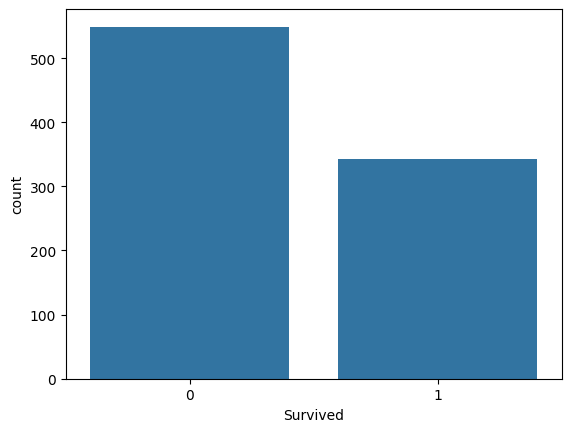

In [ ]:
sns.countplot(x='Survived', data = df_train)

<Axes: xlabel='Pclass', ylabel='count'>

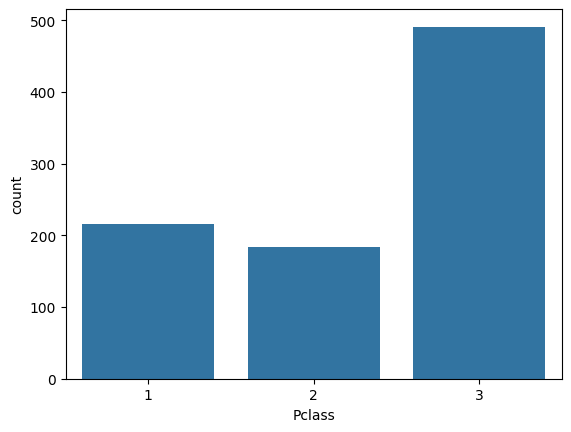

In [ ]:
sns.countplot(x='Pclass', data = df_train)

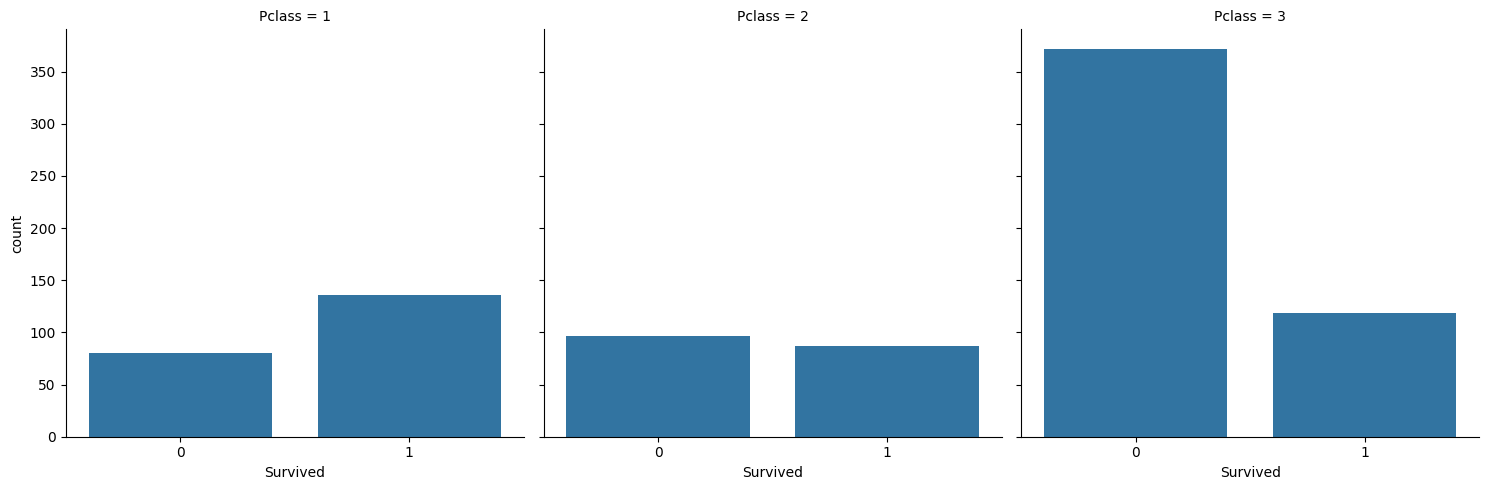

In [ ]:
sns.catplot(x='Survived', col='Pclass', kind = 'count', data = df_train)

<Axes: xlabel='Sex', ylabel='count'>

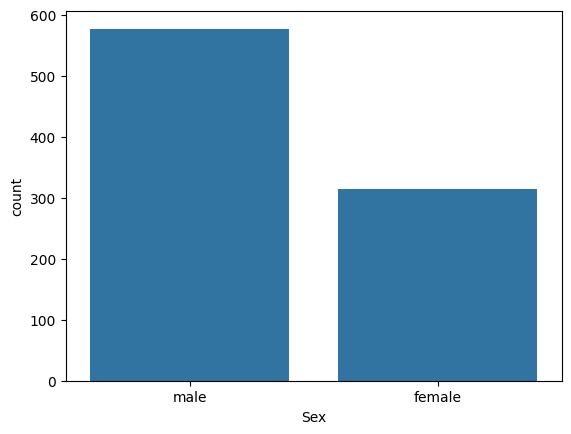

In [ ]:
sns.countplot(x='Sex', data = df_train)

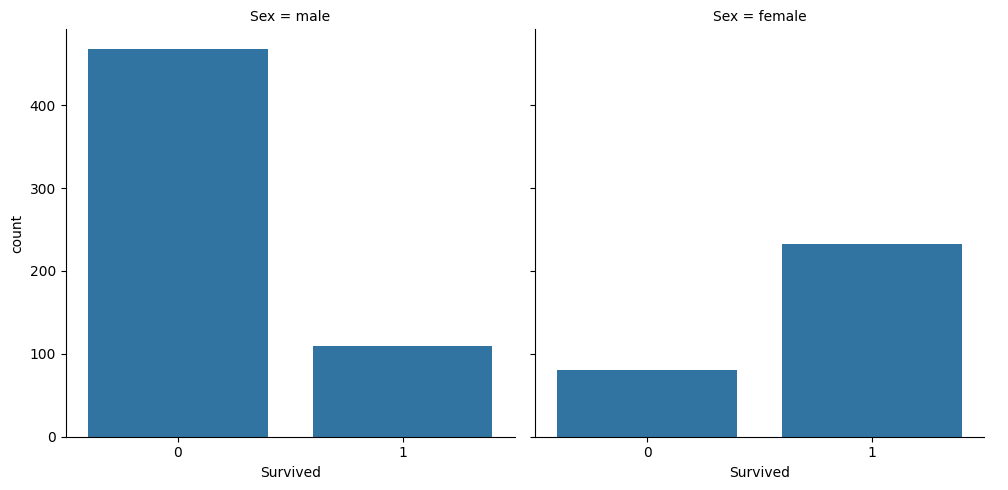

In [ ]:
sns.catplot(x='Survived', col = 'Sex', kind = 'count', data = df_train)

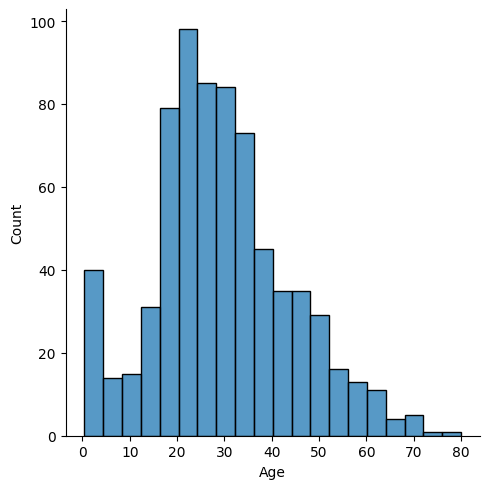

In [ ]:
sns.displot(df_train['Age'])

<Axes: xlabel='Survived', ylabel='Age'>

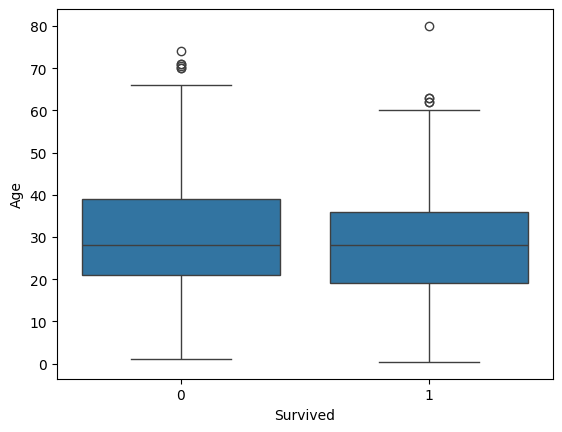

In [ ]:
sns.boxplot(x='Survived', y='Age', data = df_train)

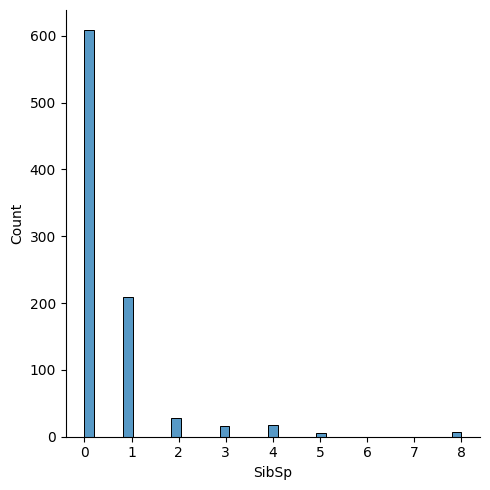

In [ ]:
sns.displot(df_train['SibSp'])

<Axes: xlabel='Survived', ylabel='SibSp'>

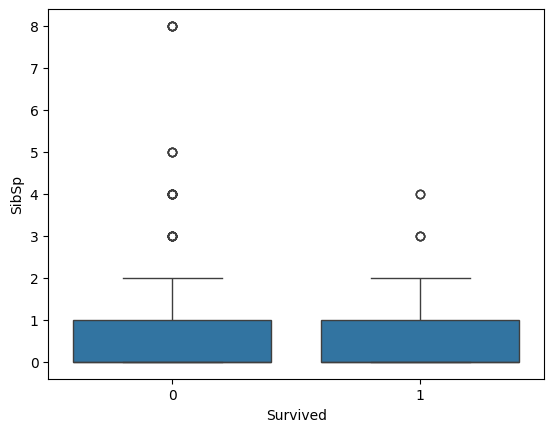

In [ ]:
sns.boxplot(x='Survived', y='SibSp', data = df_train)

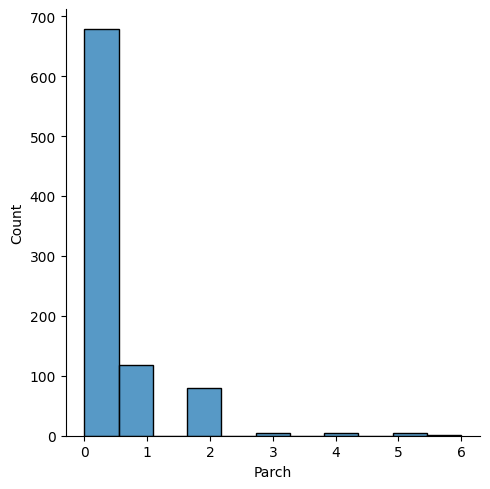

In [ ]:
sns.displot(df_train['Parch'])

<Axes: xlabel='Survived', ylabel='Parch'>

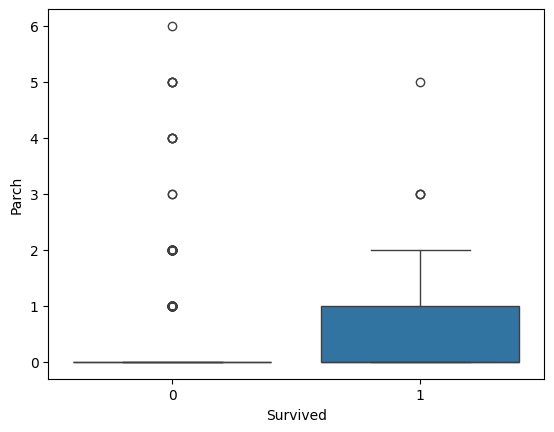

In [ ]:
sns.boxplot(x='Survived', y='Parch', data = df_train)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(df_train[["Age"]])
df_train[["ImputedAge"]] = imputer.transform(df_train[["Age"]])
df_test[["ImputedAge"]] = imputer.transform(df_test[["Age"]])

In [ ]:
df_train = df_train[['Survived', 'ImputedAge', 'Pclass', 'Sex']].copy()
df_train = pd.get_dummies(df_train, columns = ['Sex', 'Pclass'])
df_train.dropna(inplace=True)
df_train.head()

,Survived,ImputedAge,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,False,True,False,False,True
1,1,38.0,True,False,True,False,False
2,1,26.0,True,False,False,False,True
3,1,35.0,True,False,True,False,False
4,0,35.0,False,True,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split
x = df_train.drop('Survived', axis = 1)
y = df_train['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
model.score(x_test, y_test)

0.8044692737430168

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x, y, cv = 5).mean()

np.float64(0.7867553825874082)

In [ ]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)

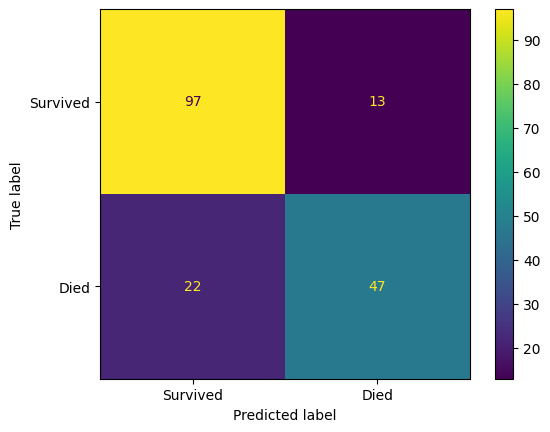

In [ ]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Survived', 'Died'])
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



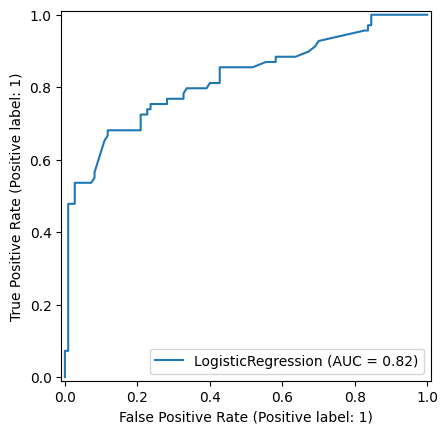

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, x_test, y_test)
plt.show()

In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ImputedAge
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0


In [ ]:
passenger_id_test = df_test['PassengerId']

In [ ]:
df_test = df_test[['ImputedAge', 'Pclass', 'Sex']].copy()
df_test = pd.get_dummies(df_test, columns = ['Sex', 'Pclass'])
df_test.dropna(inplace=True)
df_test.head()

,ImputedAge,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,34.5,False,True,False,False,True
1,47.0,True,False,False,False,True
2,62.0,False,True,False,True,False
3,27.0,False,True,False,False,True
4,22.0,True,False,False,False,True


In [ ]:
y_pred = model.predict(df_test)
submission = pd.DataFrame({
    'PassengerId': passenger_id_test,
    'Survived': y_pred
})
submission.to_csv('submission.csv', index=False)